In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import os
from glob import glob

### Funkce, která najde hranice čísel

In [2]:
def find_bounds(img):
    ret,thresh = cv2.threshold(img,127,255,0)
    contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    x,y,w,h = cv2.boundingRect(cnt)
    return x, y, w, h

### Načtení obrázků

In [6]:
img_dirs = ['./7v0/0/', './7v0/7/']
images = []
down_points = (28, 28)

for input_dir in img_dirs:
    for directory_path in glob(input_dir):
        for img_path in glob(os.path.join(directory_path, "*.png")):
            # bitwise_not obrátí barvy tak, aby čísla byla bílá a pozadí černé
            img = cv2.bitwise_not(cv2.imread(img_path, 0))
            x, y, w, h = find_bounds(img)
            # okolo čísel je ještě "padding" 10 px
            img = img[y-10:y+h+10, x-10:x+w+10]
            # zmenšení obrázku na 28x28
            resized_down = cv2.resize(img, down_points, interpolation= cv2.INTER_NEAREST)
            images.append(resized_down)
            
images = np.array(images)

In [ ]:
images = images.reshape((images.shape[0], images.shape[1], images.shape[2], 1))
images = images.astype('float32') / 255.0

Obrázky se převedou na float, přičemž hodnoty budou od 0-1 místo od 0-255

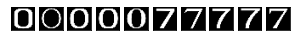

In [5]:
fig = plt.figure(figsize=(5, 2))
for i in range(len(images)):
    ax = fig.add_subplot(2, 10, i + 1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[i]), cmap='gray')

Testovací dataset

### Načtení modelu

2022-11-29 22:11:08.675538: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-29 22:11:08.675681: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


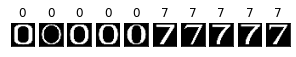

In [6]:
model = load_model('./Trained_models/trained_model_3.h5')
predictions = model.predict(images)

fig = plt.figure(figsize=(5, 2))
for i in range(len(images)):
    ax = fig.add_subplot(2, 10, i + 1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[i]), cmap='gray')
    ax.set_title(np.argmax(predictions[i]))